# 1. Preliminary

## 1.1 Context

* cours     : 
* partie 2  :
* TP        :
* date      :
* auteur.   : 
* source.   : https://www.kaggle.com/datasets/uciml/mushroom-classification

<img src="img/kaggle.png"
     alt="img/kaggle.png" />

## 1.2 Requirements

* pandas
* numpy


* scikit-learn


* matplotlib

In [1]:
package_list = ("pandas", "numpy", "scikit-learn", "matplotlib")

In [2]:
!python3 -V

Python 3.10.5


In [3]:
txt = !python3 -m pip freeze
check = lambda i : any([(pack in i) for pack in package_list]) 
txt = [i for i in txt if check(i)]
txt

['matplotlib==3.5.2',
 'matplotlib-inline==0.1.3',
 'numpy==1.22.4',
 'pandas==1.4.2',
 'scikit-learn==1.1.1']

## 1.3 Imports

In [4]:
# builtin 
import os, warnings


# data
import pandas as pd
import numpy as np


# preprocessing
from sklearn.preprocessing import LabelEncoder
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
# estimators
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import roc_curve, auc

# visualisation
import matplotlib.pyplot as plt


## 1.4 Graphics and options

In [5]:
# warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

<div class="alert alert-info" role="alert">
  Nous désactivons les messages d'erreurs </div>

## 1.5 Data

<img src="img/tree.jpg"
     alt="img/tree.jpg" />

<div class="alert alert-info" role="alert">
  Une bonne organisation de dossiers / fichiers vous évitera bien des problèmes!
</div>

In [6]:
os.listdir()

['.DS_Store',
 '00_EDA.ipynb',
 'requirements.txt',
 'TP',
 'env',
 'img',
 'partie_2',
 '.ipynb_checkpoints',
 'data',
 '01_modelisation.ipynb']

In [7]:
path     = "./data/cleaned/"        
filename = "df_cleaned.csv"   

In [8]:
df = pd.read_csv(path + filename)
df.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# 2. Data preraration

## 2.1 X & y

In [9]:
X = df.drop(columns="target")
y = df.target

In [10]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [11]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

## 2.2 Test train split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [13]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme  {y_train.shape}  ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme  {y_test.shape}  ")

Nous avons X_train de forme (5686, 22) et y_train de forme  (5686,)  
Nous avons X_test de forme (2438, 22) et y_test de forme  (2438,)  


# 3. Modelisation

## 3.1 Dummy classifier

In [14]:
estimator = DummyClassifier(strategy="most_frequent")
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [15]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
pd.Series(y_pred).value_counts()

0    2438
dtype: int64

In [17]:
y_test.value_counts()

0    1257
1    1181
Name: target, dtype: int64

In [18]:
y_test.values

array([0, 1, 1, ..., 1, 0, 0])

In [19]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f"score train : {tr_score} score test : {te_score} ")

score train : 0.519 score test : 0.5156 


In [20]:
def score(estimator):
    """compute and print train score and test score"""
    
    tr_score = estimator.score(X_train, y_train).round(4)
    te_score = estimator.score(X_test, y_test).round(4)

    print(f"score train : {tr_score} score test : {te_score} ")

In [21]:
score(estimator)

score train : 0.519 score test : 0.5156 


In [22]:
pd.Series(y_train).value_counts(normalize=True).round(4)

0    0.519
1    0.481
Name: target, dtype: float64

In [23]:
pd.Series(y_test).value_counts(normalize=True).round(4)

0    0.5156
1    0.4844
Name: target, dtype: float64

In [24]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[1257,    0],
       [1181,    0]])

In [25]:
mat = pd.DataFrame(mat)
mat

,0,1
0,1257,0
1,1181,0


In [26]:
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [27]:
def confusion(y_test, y_pred) : 
    """display a fancy confusion matrix """

    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]
    
    return mat

In [28]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

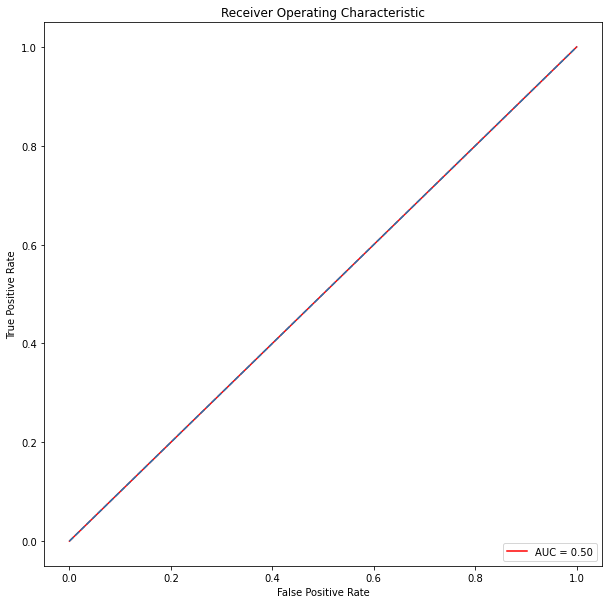

In [30]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3.2 Logistic regression

### 3.2.1  Without GridSearch

In [31]:
estimator = LogisticRegression()
estimator.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [33]:
y_prob = estimator.predict_proba(X_test).round(2)
y_prob

array([[1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [34]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.9509 score test : 0.95 


,pred_0,pred_1
test_0,1200,57
test_1,65,1116


In [35]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


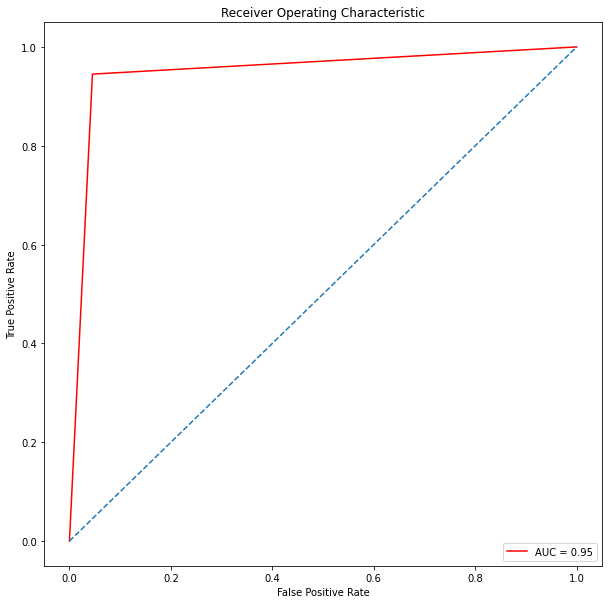

In [36]:

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4.3.2 Using GridSearch

In [37]:
estimator = LogisticRegression(solver = 'liblinear')
params = {  'C': np.logspace(-3, 3, 7) , 
            'penalty':['l1','l2'] 
         }

In [38]:
grid = GridSearchCV(estimator, 
                    params, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True, 
                    verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increas

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=1)

In [39]:
print(grid.best_params_)

{'C': 1000.0, 'penalty': 'l2'}


In [40]:
res = grid.cv_results_
res = pd.DataFrame(res)
res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008731,0.002991,0.001149,0.000644,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.772408,0.764292,0.788039,...,0.771368,0.008799,14,0.771108,0.773137,0.767202,0.772917,0.772477,0.771368,0.002199
1,0.009922,0.002180,0.000798,0.000022,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.870826,0.857520,0.872471,...,0.866689,0.005224,13,0.865435,0.869642,0.866784,0.866564,0.867443,0.867174,0.001393
2,0.025724,0.003803,0.000774,0.000054,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.905097,0.890941,0.897098,...,0.897994,0.004511,12,0.897537,0.899978,0.902616,0.896900,0.898879,0.899182,0.002021
3,0.011008,0.001983,0.000746,0.000048,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.908612,0.905893,0.906772,...,0.907140,0.002653,11,0.909191,0.907892,0.914047,0.907013,0.908332,0.909295,0.002478
4,0.094405,0.021870,0.001866,0.001548,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.953427,0.941953,0.944591,...,0.945127,0.004238,9,0.943931,0.945043,0.946362,0.944823,0.945043,0.945040,0.000778
5,0.015230,0.002480,0.001087,0.000796,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.942882,0.933157,0.934916,...,0.934223,0.004784,10,0.932718,0.935151,0.937569,0.934491,0.934711,0.934928,0.001559
6,2.326485,0.544719,0.001298,0.000731,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.966608,0.948989,0.948989,...,0.951809,0.007441,6,0.962401,0.954276,0.956034,0.948780,0.953177,0.954933,0.004435
7,0.036106,0.004067,0.002185,0.001206,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.958699,0.944591,0.947230,...,0.947061,0.006243,8,0.950748,0.950319,0.949879,0.946801,0.947681,0.949086,0.001556
8,3.391137,0.679872,0.001608,0.000732,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.977153,0.954266,0.952507,...,0.957436,0.010045,4,0.971636,0.959552,0.960651,0.953616,0.958013,0.960693,0.005972
9,0.044459,0.005316,0.000984,0.000569,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.966608,0.946350,0.948989,...,0.950402,0.008236,7,0.959543,0.952737,0.954056,0.948340,0.948780,0.952691,0.004075


In [41]:
cols = [i for i in res.columns if "split" not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [42]:
res = res[cols]
res = res.sort_values("rank_test_score")
res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
13,0.076577,0.006229,0.001350,0.000794,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.959370,0.009776,1,0.962232,0.006608
12,3.672104,0.572184,0.000729,0.000008,1000.0,l1,"{'C': 1000.0, 'penalty': 'l1'}",0.958491,0.010315,2,0.962012,0.006608
10,3.444566,0.807814,0.001251,0.000642,100.0,l1,"{'C': 100.0, 'penalty': 'l1'}",0.958315,0.009967,3,0.961837,0.006295
8,3.391137,0.679872,0.001608,0.000732,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.957436,0.010045,4,0.960693,0.005972
11,0.067152,0.013889,0.000958,0.000530,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.956908,0.010808,5,0.960430,0.006500
6,2.326485,0.544719,0.001298,0.000731,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.951809,0.007441,6,0.954933,0.004435
9,0.044459,0.005316,0.000984,0.000569,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.950402,0.008236,7,0.952691,0.004075
7,0.036106,0.004067,0.002185,0.001206,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.947061,0.006243,8,0.949086,0.001556
4,0.094405,0.021870,0.001866,0.001548,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.945127,0.004238,9,0.945040,0.000778
5,0.015230,0.002480,0.001087,0.000796,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.934223,0.004784,10,0.934928,0.001559


In [67]:
estimator = LogisticRegression(penalty="l2", C=1000)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, ..., 1, 0, 0])

In [60]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.9544 score test : 0.9537 


,pred_0,pred_1
test_0,1198,59
test_1,54,1127


In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


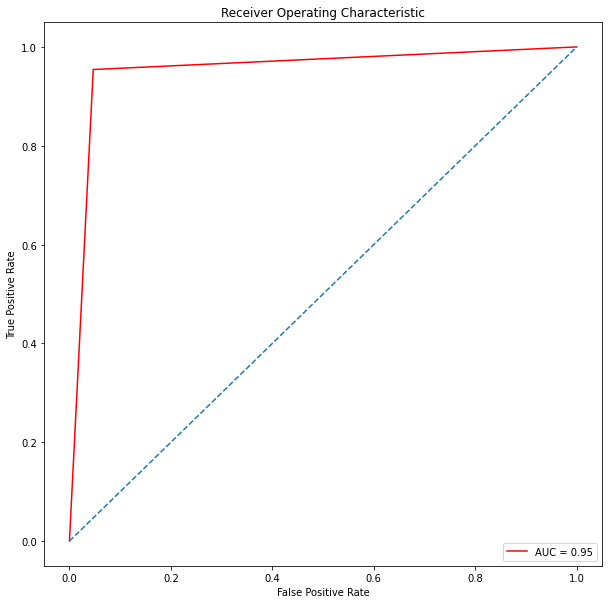

In [62]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3.3 SVM

### 3.3.1 with Gridsearch

In [68]:
estimator = LinearSVC()

params = { 'C': np.logspace(-3, 3, 7) }

In [69]:
grid = GridSearchCV(estimator, 
                    params, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True, 
                    verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increas

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, verbose=1)

In [70]:
print(grid.best_params_)

{'C': 1.0}


In [71]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i]
res = res[cols]
res.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,0.199263,0.003410,0.001020,0.000607,1.0,{'C': 1.0},0.948116,0.005713,1,0.948558,0.003878
2,0.178914,0.022021,0.001656,0.001263,0.1,{'C': 0.1},0.946358,0.005321,2,0.947986,0.001338
5,0.212571,0.011848,0.000711,0.000058,100.0,{'C': 100.0},0.946003,0.017959,3,0.946624,0.012577
4,0.203632,0.006115,0.000937,0.000476,10.0,{'C': 10.0},0.937561,0.016633,4,0.941128,0.011357
1,0.029849,0.001488,0.000906,0.000053,0.01,{'C': 0.01},0.936861,0.003845,5,0.937214,0.000982
0,0.009687,0.001367,0.001217,0.000194,0.001,{'C': 0.001},0.911712,0.003002,6,0.912812,0.002280
6,0.190268,0.022653,0.000691,0.000052,1000.0,{'C': 1000.0},0.906955,0.079794,7,0.904505,0.085744


In [72]:
estimator = LinearSVC(C=1.0)
estimator.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [73]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [74]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.9476 score test : 0.9475 


,pred_0,pred_1
test_0,1198,59
test_1,69,1112


In [75]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


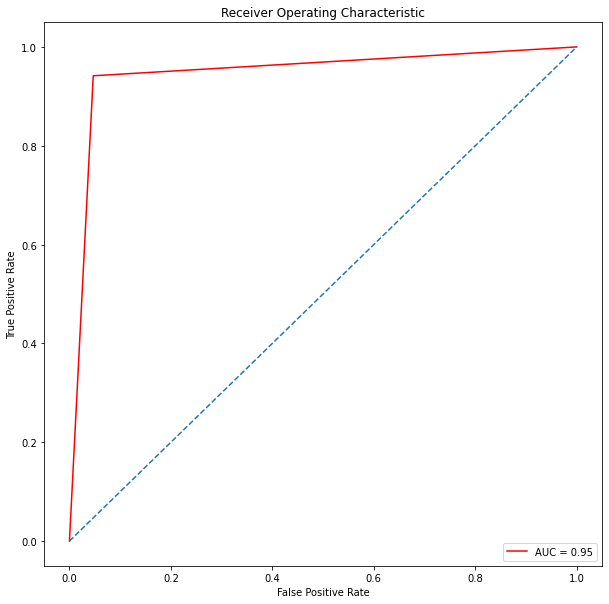

In [76]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()